In [1]:
import sys
sys.path.insert(0,'/home/antonio/Desktop/VIRMAT/2Danalysis/2Danalysis_wMDA/')
from protein2D_analysis import BioPolymer2D # type: ignore
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nglview as nv


#  **BioPolymer2D** class

BioPolymer2D is an object-oriented class based on MDAnalysis that is part of the twod_analysis toolkit package that is initialized by an MDAnalysis Universe or Atom Group, enabling the use of universes and Atom groups that have been previously initialized to be used for built-in MDAnalysis methods.

Tipically, polymeric biomolecules (biopolymers), such as proteins, peptides and nucleic acid, interactions are studied in 3D since the dynamics and interactions are present in all degrees of freedom. When the biopolymer is interacting with a flat 2-dimentional surface, this approach could give results that are hard for interpretation by overstimating dynamics that are far from the adsorption regime or dynamics on the Z directions. In this class, we propose four analysis funtions that will be focused in retrieving detailed information on the adsorption mechanisms of biopolymers onto surfaces:

1. **Polar Histogram analysis**:
Polar histogram of residues from the center of mass of a given selection of atoms. This type of analysis gives detailed information on the distribution of the positions of the residues over the simulations. These histograms can be interpreted as probability distribution histograms (PDF) of the residues, and therefore the width of the histogram is an indicative of the flexiblity of the residues. This analysis has been previously used in Supplementary information of [Bosch, A.M.,et al](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460).

2. **KDE density contour analysis**:
Using the seaborn.kde_plot function makes a contour plot of selected residues from a selection of residues using only a set of adsorpbed to the surface frames of the simulation, and is able to compute the areas of a given contour level. Similarly to the polar plot, the area of the contour plots can give information on the flexibility of the residue, but also give insight on the the specificity of the interactions depending on the chosen level of the contour plot that is selected to compute the area. 

Analogue to polar analysis, these KDE position density contours are 2-dimentional probability distribution histograms. Therefore, by measuring the area of diferent contour levels you can measure diferent properties if the interaction, for instance,
*  By computing th area of the lower contour levels, you can sample all the available spaces states in the X and Y axis which is an indicative of how flexible ("entropic") is the system. That is, higher area values at the lowest contour levels shows more flexibility. 

* On the other hand, by computng the area of higher contour level, you can sample the available space state of the peak of the distribution, giving insight on the specificity of the interaction. That is, lower area values at the highest contour levels show more specificity. 
3. **Parallel and perpendicular radii of gyration**:
Computes the standard 3D ($R_g$), parallel ($R_{g\parallel}$) and perpendicular ($R_{g\perp}$) radii of gyration.

$$R_{\textrm{g}}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2+(z_i-z_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\parallel}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\perp} = \sqrt{\frac{1}{m_T}\sum_{i} m_{i} (z_i-z_{\text{CM}})^2,}$$

where ${\bf R}_{\textrm{CM}}=(x_{\textrm{CM}}$, $y_{\textrm{CM}}$, $z_{\textrm{CM}})$ is the position of the center of mass, $m_{i}$ the mass of each residue and $m_T$ the total mass of the residues.

The parallel and perpendicular radii of gyration gives strutural information during the adsorption,

* $R_{g\parallel}$: Gives information on how the biopolymer is expanded by the sides (parallel to the surface). 

* $R_{g\perp}$ : Gives information on how the biopolymer is streched or flattened.

and, if compared to native environment, it can give insight on the deformation of the biopolymer due to the surface presence, as was done in [Bosch, A.M.,et al](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460), where we compare these values for the open SARS-CoV2 RBD onto polarizable bilayers to its native ACE2 enzyme.

Note that $R_{g\parallel}$ and $R_{g\perp}$ are not necesarilly correlated since secondary strucutures as biomolecules have cavities. This is specilly true for proteins.

When these values are computed, there the posibility to generate a plot indicating $\langle R_{g\perp}^2 \rangle /\langle R_{g\parallel}^2 \rangle$ ratio, which is relevant in polymer theory ([**ADD CITATIONS**]) when studying polymer adsorption, and a $R_{g\perp}$ vs $R_{g\parallel}$ plot similar to Figure 1.

<div style="text-align: center;">
    <img src="images/TOC12_Final.png" width="600" alt="FIGURE 1" />
    <p><b>Figure 1:</b> Figure extracted from <a href="https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460" target="_blank">Bosch, A.M., et al.</a> 
    It shows a plot similar to the one generated by the toolbox, with some graphical representation of the 
    \( R_{g\parallel} \) and \( R_{g\perp} \) .</p>
</div>




4. **H-bonds per residues**:

In order to further understand the present interactions between surfaces and the biopolymer, this tool computes the Hbonds of each residue in a selection of residues during the simulation. As an output you will have a table sorted from the residues with most to the least Hbonds, and there is the posibitly to have a plot show the center of mass of the residues from a bottom perspective. This tool uses MDAnalysis protocol to compute Hbonds which is a geometric approach of Hbond computation, and uses MDAnalysis default parameters to compute them. 



## Case of study 4: Closed SARS-CoV2 RBD with glycans in highly hydrophobic and hydrophyilic surfaces with **BioPolymer2D** class

### System

In this tutorial, we will be using the BioPolymer2D to analyze the adsorption mechanisms of a protein onto a surface. In this case, we will be using the SARS-CoV2 RBD with glycans where we will be able to compare flexibility of Glycans vs flexbility of protein. It is expected glycans to be more flexible than proteins since protein have secondary structures that reduces the degrees of freedom of the atoms. 


By running the cell below, we can see our system that is given by the SARS-CoV2 RBD in black, the glycan in red and the polarizable bilayer (PBL) in yellow as shown in Figure 2.

<div style="text-align: center;">
    <img src="images/System.png" width="400" alt="FIGURE 2" />
    <p><b>Figure 2:</b> System that with be used for the tutorial. SARS-CoV2 RBD is shown in black, the glycan in red and the polarizable bilayer (PBL) in yellow. </p>
</div>


In [2]:
trj_path='/home/antonio/Desktop/VIRMAT/Paper_PB_KDE/SIMs/RBD-PBLs_wGlyc_closed_layed/glyc_head/rep1/omicron_10/'
u=mda.Universe(f"{trj_path}md_0_1.tpr",f"{trj_path}md_short_compact.xtc")
sel = u.select_atoms("resid 193-200 or protein")

In [3]:

# view=nv.show_mdanalysis(u)
# # Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# # Selection of molecules in protein
# prot = u.select_atoms("protein")
# # Selection of molecules in Glycan
# glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow')
# view.add_representation('cartoon', selection=prot.atoms.indices,color='black')
# view.add_representation('licorice', selection=glyc.atoms.indices,color='red')

# view.layout.width = '500px'  # Set the width
# view.layout.height = '400px'  # Set the height
# view.center()
# # Display the view
# view

Although, the whole trajectory can be seen in the latter output, it is not recommended since reproduction will be slow. In such case you want to see the whole trajectory, uncomment cell below.

In [4]:

### Uncomment if you want to see the trajectory
# t = nv.MDAnalysisTrajectory(u.select_atoms('protein or resname DOL or resname AFUC BMAN AMAN BGLCNA'))
# w = nv.NGLWidget(t)
# w

### Initializing object

Now, that we have initialized a Universe or an AtomGroup, we will initialize our BioPolymer2D object. This can be initialized either with a MDAnalysis AtomGroup or a Universe. The class has two main attributes, universe and atom_group. If initialized with a Universe, the attribute atom_group will be the AtomGroup of the whole system. For instance:

In [5]:
ag_analysis = BioPolymer2D(u)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 78220
  N residues: 18721
  N segments: 4
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 78220
  N selected residues: 18721
  N selected segments: 4


Note that Selection info has the same number of atoms and residues that Universe info.

If the class is initialized with a selection, we will get different selection with the Universe:

In [6]:
ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 78220
  N residues: 18721
  N segments: 4
  Time : 0.0-300.0ns dt=0.2ns
  N frames : 1500
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


Attribute system_name is simply to set the name of the system. This will be usefull for doing legends and title during the analysis plots if there is more than one system to be analyzed.

Note that by default, the object is set to compute all the further calculation over all the frames in the universe with attributes `self.startT`, `self.endT` and `self.stepT` set to have the time length of the whole universe. This can be changed by overloading these attributes, as follows:

In [7]:
ag_analysis.startT=100
ag_analysis.endT=200
ag_analysis.stepT=0.4
ag_analysis.INFO()

=== UNIVERSE INFO ===
  N atoms: 78220
  N residues: 18721
  N segments: 4
  Time : 100-200ns dt=0.4ns
  N frames : 250
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


It must be warned that if `stepT` is smaller than initial Universe, you will have problems during the analysis calculations. 

If we now compute the positions of the residues with:

In [8]:
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 250 to 500 with steps of 1
250 500


(250, 200, 4)

We get a numpy array of size (`ag_analysis.endF` -`ag_analysis.startF`, `Nresidues` ,`pos` \<t,x,y,z\> ). If we want to compute the positions of atoms instead of the center of mass of residues, you can get use:

In [9]:
ag_analysis.getPositions(pos_type='all')
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 250 to 500 with steps of 1
250 500


(250, 3227, 4)

Note that the calculation of `getPosition` will be a typical first step after initializing the object. It has not added as a default calculation when initialize to be able to customize the this calculations as previouly mentioned and give the liberty to assign positions to the object if they were previously computed, although this must be done very carefully, to consitently set other attributed of the object. 

The`getPositions` method that by default will store the positions in place in the object attribute `self.pos`:

In [10]:

ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 0 to 1500 with steps of 1
0 1500


(1500, 200, 4)

If we do not want to store the positions as an attribute of the object, we can simply set `inplace=False`. This way we could use this function to compute the positions of any selection of the universe without overwriting the `self.pos` attribute of the object. For instance:

In [11]:
glycan_extreme_residues_pos=ag_analysis.getPositions(select='resid 198 200', inplace=False)
print(glycan_extreme_residues_pos.shape, "residues computes with inplace=False")
print(ag_analysis.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 1500 with steps of 1
(1500, 2, 4) residues computes with inplace=False
(1500, 200, 4) residues computes with inplace=True


Or even compute the positions of all atoms:

In [12]:
all_atoms_pos=ag_analysis.getPositions(select='resid 198 200', inplace=False)
print(all_atoms_pos.shape, "residues computes with inplace=False")
print(ag_analysis.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 1500 with steps of 1
(1500, 2, 4) residues computes with inplace=False
(1500, 200, 4) residues computes with inplace=True


### Polar Analysis 

Now we will reinitialize our object and compute the positions of the selection to compute the **polar histograms of residues** by using our previusly selected residues (all residues in the protein+glycan), and we will call the system "Omicron PBL1", since we are working with the Omicron variant of the SARS-COV2 RBD with a PBL of polarity 1 (completly hydrophilic).

In [13]:

ag_analysis = BioPolymer2D(sel)
ag_analysis.system_name='Omicron PBL1'
ag_analysis.getPositions()
print(ag_analysis.startF,ag_analysis.endF)
ag_analysis.pos.shape

Getting positions from frame 0 to 1500 with steps of 1
0 1500


(1500, 200, 4)

Since the PBLs gives a certain height to the positions we will compute the positions of the oxigens that are on top of the decanol surface of the PBLs, compute the mean a substact this value to the positions of the residues of the selection:

In [17]:
dol_pos=ag_analysis.getPositions(select='resname DOL and name O1 and prop z > 16', inplace=False)
print(dol_pos.shape)
mean_dol_pos=dol_pos.mean(axis=(0,1))
ag_analysis.surf_pos=mean_dol_pos[1:]
mean_dol_pos


Getting positions from frame 0 to 1500 with steps of 1
(1500, 324, 4)


array([149.9       ,  41.72365164,  36.96741257,  26.97171394])

In [18]:
z_mean_dol_pos=mean_dol_pos[3]
print(ag_analysis.pos.mean(axis=(0,1)))
ag_analysis.pos[:,:,3]=ag_analysis.pos[:,:,3]-z_mean_dol_pos
print(ag_analysis.pos.mean(axis=(0,1)))


[149.9         41.52667678  36.74258969  28.94035451]
[149.9         41.52667678  36.74258969   1.96864057]


We have confirmed that the positions in Z axis have been subtracted, so the referece height is the surface. 

Now that we have computes the positions we can do our analysis using `PolarAnalysis` method, 

Computing Polar Analysis from frame 0 (t=0.0ns) to 1500 (t=300.0ns) 
Getting positions from frame 0 to 1500 with steps of 1
<ResidueGroup [<Residue ASN, 12>, <Residue BGLCNA, 193>, <Residue AFUC, 194>, <Residue BGLCNA, 195>, <Residue BMAN, 196>, <Residue AMAN, 197>, <Residue BGLCNA, 198>, <Residue AMAN, 199>, <Residue BGLCNA, 200>]>
(1500, 9, 4)
(1500,)
There are 1301  frames < 15 A in Z
Taking 900 closest frames to surface...
(900, 9, 4)
(9, 4) MeanPos
(900, 9, 4) (900, 9, 4)
(900, 3, 4) (900, 3, 4)


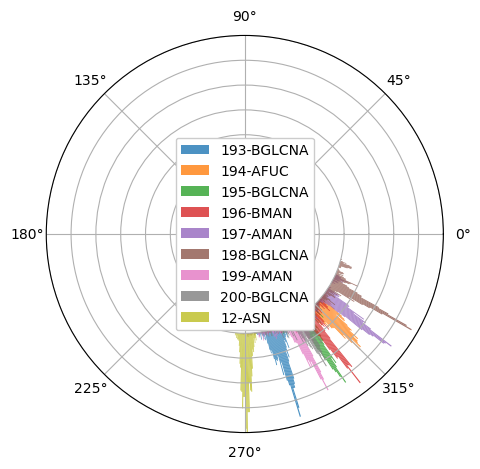

In [19]:
hist_arr,pos_hist=ag_analysis.PolarAnalysis('resid 193-200 or resid 12',900, sort=[1,2,3,4,5,6,7,8,0],zlim=15,control_plots=False,plot=True)